# GridWorld Problem

In [3]:
using Plots
using ProgressBars

In [2]:
import ReinforcementLearning.FiniteMarkovDecisionProcesses as MDP

┌ Info: Precompiling ReinforcementLearning [5ca72b03-e5bd-456a-9069-e6113efe0641]
└ @ Base loading.jl:1342


## Problem setup

In [4]:
next_states = [
    # 1 (up)  2 (down)  3 (right)  4 (left) 
      1       5         2         15         #  1
      2       6         3          1         #  2 
      3       7         3          2         #  3
     15       8         5          4         #  4
      1       9         6          4         #  5
      2      10         7          5         #  6
      3      11         7          6         #  7
      4      12         9          8         #  8
      5      13        10          8         #  9
      6      14        11          9         # 10
      7      15        11         10         # 11
      8      12        13         12         # 12
      9      13        14         12         # 13
     10      14        15         13         # 14
     15      15        15         15         # 15
]

rewards = -1*ones(size(next_states))
rewards[15, :] .= 0

fmdp = MDP.DeterministicFiniteMDP((s, a) -> next_states[s, a], (s, a) -> rewards[s, a], 4, 15, 15);

In [5]:
uniform_random_policy = 0.25 * ones(size(next_states)...)
V_uniform_random_policy = [-14.0, -20.0, -22.0, -14.0, -18.0, -20.0, -20.0, -20.0, -20.0, -18.0, -14.0, -22.0, -20.0, -14.0, 0.0];

random_deterministic_policy = rand(1:4, size(next_states, 1));

In [6]:
optimal_V = [-1.0, -2.0, -3.0, -1.0, -2.0, -3.0, -2.0, -2.0, -3.0, -2.0, -1.0, -3.0, -2.0, -1.0, 0.0];

In [8]:
optimal_Q = MDP.allocate_Q(fmdp)
optimal_𝐏 = MDP.allocate_Q(fmdp, x -> 0.0)

MDP.Q_from_V!(optimal_Q, optimal_V, fmdp, 1.0)
MDP.𝐏_from_Q!(optimal_𝐏, optimal_Q)

optimal_𝐏

15×4 Matrix{Float64}:
 0.0   0.0   0.0   1.0
 0.0   0.0   0.0   1.0
 0.0   0.5   0.0   0.5
 1.0   0.0   0.0   0.0
 0.5   0.0   0.0   0.5
 0.25  0.25  0.25  0.25
 0.0   1.0   0.0   0.0
 1.0   0.0   0.0   0.0
 0.25  0.25  0.25  0.25
 0.0   0.5   0.5   0.0
 0.0   1.0   0.0   0.0
 0.5   0.0   0.5   0.0
 0.0   0.0   1.0   0.0
 0.0   0.0   1.0   0.0
 0.25  0.25  0.25  0.25

## Some Handy Utilities

In [9]:
function V_to_matrix_form(V)
    VV = Matrix{Float64}(undef, 4, 4)
    VV[1,1] = V[15]
    for i = 1:14
        k = div(i,4)
        ℓ = rem(i,4)
        VV[k+1, ℓ+1] = V[i]
    end
    VV[4,4] = VV[1,1]
    return VV
end

V_test = 1:15
V_to_matrix_form(V_test)

4×4 Matrix{Float64}:
 15.0   1.0   2.0   3.0
  4.0   5.0   6.0   7.0
  8.0   9.0  10.0  11.0
 12.0  13.0  14.0  15.0

In [10]:
function action_to_char(a::Integer)
    if a == 1 # up
        return '↑'
    elseif a == 2 # down
        return '↓'
    elseif a == 3 # right
        return '→'
    elseif a == 4 # left
        return '←'
    else
        return '?'
    end
end

action_to_char (generic function with 1 method)

In [11]:
function 𝐩_to_matrix_form(𝐩)
    PP = Matrix{Char}(undef, 4, 4)
    PP[1,1] = '█'
    for i = 1:14
        k = div(i,4)
        ℓ = rem(i,4)
        PP[k+1, ℓ+1] = action_to_char(𝐩[i])
    end
    PP[4,4] = '█'
    return PP
end

𝐩_to_matrix_form(random_deterministic_policy)

4×4 Matrix{Char}:
 '█'  '↑'  '←'  '↓'
 '→'  '→'  '→'  '→'
 '↓'  '↓'  '→'  '↑'
 '←'  '→'  '↑'  '█'

In [12]:
function action_probabilities_to_char(𝕡::AbstractVector{<:Real})
    vert = ' '
    if 𝕡[1] > 0 && 𝕡[2] > 0 # both UP and DOWN are valid
        vert = '↕'
    elseif 𝕡[1] > 0 # only UP is valid
        vert = '↑'
    elseif 𝕡[2] > 0 # only DOWN is valid
        vert = '↓'
    end
    horz = ' '
    if 𝕡[3] > 0 && 𝕡[4] > 0 # both RIGHT and LEFT are valid
        horz = '↔'
    elseif 𝕡[3] > 0 # only RIGHT is valid
        horz = '→'
    elseif 𝕡[4] > 0 # only LEFT is valid
        horz = '←'
    end
    return "$vert$horz"
end

action_probabilities_to_char (generic function with 1 method)

In [13]:
function 𝐏_to_matrix_form(𝐏)
    PP = Matrix{String}(undef, 4, 4)
    PP[1,1] ="█"
    for i = 1:14
        k = div(i,4)
        ℓ = rem(i,4)
        PP[k+1, ℓ+1] = action_probabilities_to_char(𝐏[i,:])
    end
    PP[4,4] = "█"
    return PP
end

𝐏_to_matrix_form(uniform_random_policy)

4×4 Matrix{String}:
 "█"   "↕↔"  "↕↔"  "↕↔"
 "↕↔"  "↕↔"  "↕↔"  "↕↔"
 "↕↔"  "↕↔"  "↕↔"  "↕↔"
 "↕↔"  "↕↔"  "↕↔"  "█"

In [17]:
𝐏_to_matrix_form(optimal_𝐏)

4×4 Matrix{String}:
 "█"   " ←"  " ←"  "↓←"
 "↑ "  "↑←"  "↕↔"  "↓ "
 "↑ "  "↕↔"  "↓→"  "↓ "
 "↑→"  " →"  " →"  "█"

In [14]:
function find_errors_in_policy(𝐩::AbstractVector{<:Integer}, 𝐏::AbstractMatrix{<:Real})
    errors = []
    for s in 1:length(𝐩)-1
        if 𝐏[s, 𝐩[s]] == 0
            push!(errors, s)
        end
    end
    return errors
end

find_errors_in_policy (generic function with 1 method)

In [16]:
function error_symbol(ch)
    if ch == '↑'
        return '⍐'
    elseif ch == '↓'
        return '⍗'
    elseif ch == '→'
        return '⍈'
    elseif ch == '←'
        return '⍇'
    else
        return ' '
    end
end

function 𝐩_to_matrix_form_with_errors(𝐩, 𝐏)
    PP = 𝐩_to_matrix_form(𝐩)
    errors = find_errors_in_policy(𝐩, 𝐏)
    for err in errors
        k = div(err, 4)
        ℓ = rem(err, 4)
        PP[k+1, ℓ+1] = error_symbol(PP[k+1, ℓ+1])
    end
    return PP
end

𝐏 = zeros(15, 4)
𝐩_to_matrix_form_with_errors(random_deterministic_policy, optimal_𝐏)

4×4 Matrix{Char}:
 '█'  '⍐'  '←'  '↓'
 '⍈'  '⍈'  '→'  '⍈'
 '⍗'  '↓'  '→'  '⍐'
 '⍇'  '→'  '⍐'  '█'

## Dynamic Programming

### DP: Policy Evaluation

#### DP: Policy Evaluation via "Textbook" Approach

In [18]:
𝐏 = copy(uniform_random_policy);

In [19]:
V = MDP.allocate_V(fmdp)
Q = MDP.allocate_Q(fmdp)
V[MDP.terminal_state(fmdp)] = 0

iters_no, converged = MDP.dp_evaluate_policy_textbook!(V, Q, fmdp, 𝐏, 1.0; tol = 1e-4, maxiter = 1000)

ΔV = abs.(V - V_uniform_random_policy)

print("Achieved error = $(max(ΔV...)), after $iters_no iterations.")

Achieved error = 0.0017206230315878202, after 174 iterations.

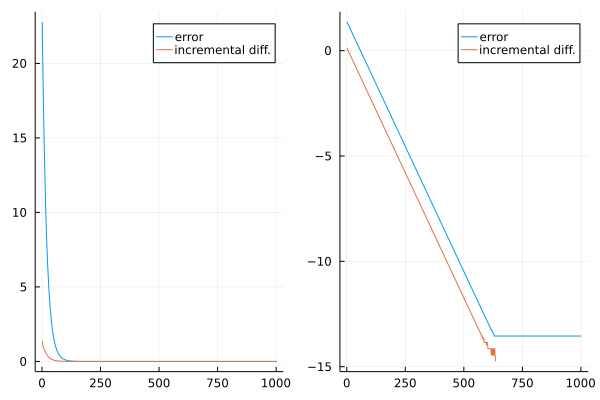

In [20]:
V = MDP.allocate_V(fmdp)
Q = MDP.allocate_Q(fmdp)
V[MDP.terminal_state(fmdp)] = 0

compute_Δ = V_ -> max.((abs.(V_ - V_uniform_random_policy))...)

iters_no = 1000

δ = zeros(iters_no+1)
Δ = zeros(iters_no+1)

δ[1] = NaN
Δ[1] = compute_Δ(V)

for i in 1:iters_no
    MDP.Q_from_V!(Q, V, fmdp, 1.0)
    δ[i+1] = MDP.V_from_Q!(V, Q, 𝐏)
    Δ[i+1] = compute_Δ(V)
end # for: iterations

Δ_textbook = copy(Δ)

l = @layout [a b]
p1 = plot(Δ, label="error")
plot!(δ, label="incremental diff.")
p2 = plot(log10.(Δ), label="error")
plot!(log10.(δ), label="incremental diff.")
plot(p1, p2, layout = l)


In [21]:
V_dp_random_policy = copy(V)
V_to_matrix_form(round.(V_dp_random_policy; digits=2))

4×4 Matrix{Float64}:
   0.0  -14.0  -20.0  -22.0
 -14.0  -18.0  -20.0  -20.0
 -20.0  -20.0  -18.0  -14.0
 -22.0  -20.0  -14.0    0.0

In [27]:
𝐩 = MDP.allocate_𝐩(Q)
MDP.𝐩_from_Q!(𝐩, Q)

𝐩_to_matrix_form_with_errors(𝐩, optimal_𝐏)

4×4 Matrix{Char}:
 '█'  '←'  '←'  '↓'
 '↑'  '←'  '↓'  '↓'
 '↑'  '↑'  '→'  '↓'
 '↑'  '→'  '→'  '█'

#### DP: Policy Evaluation using in-place update of V

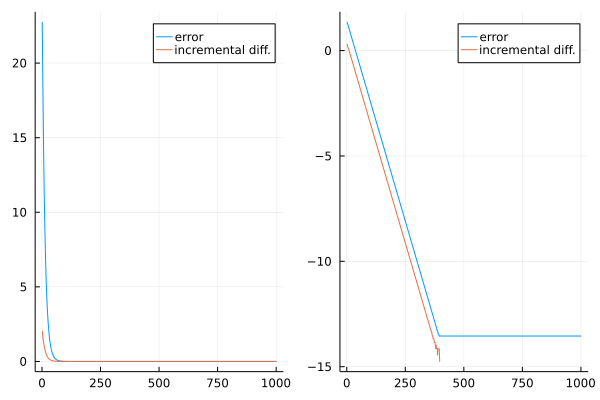

In [28]:
𝐏 = copy(uniform_random_policy)

V = MDP.allocate_V(fmdp)
Q = MDP.allocate_Q(fmdp)
V[MDP.terminal_state(fmdp)] = 0

compute_Δ = V_ -> max.((abs.(V_ - V_uniform_random_policy))...)

iters_no = 1000

δ = zeros(iters_no+1)
Δ = zeros(iters_no+1)

δ[1] = NaN
Δ[1] = compute_Δ(V)

for i in 1:iters_no
    MDP.Q_from_V!(Q, V, fmdp, 1.0)
    δ[i+1] = MDP.dp_update_V!(V, fmdp, 𝐏, 1.0)
    Δ[i+1] = compute_Δ(V)
end # for: iterations

Δ_Vinplace = copy(Δ)

l = @layout [a b]
p1 = plot(Δ, label="error")
plot!(δ, label="incremental diff.")
p2 = plot(log10.(Δ), label="error")
plot!(log10.(δ), label="incremental diff.")
plot(p1, p2, layout = l)

In [29]:
ndx = findfirst(δ .≤ 1e-4)
print("Achieved error = $(max(ΔV...)), after $(ndx-1) iterations.")

Achieved error = 0.0017206230315878202, after 115 iterations.

#### DP: Policy Evaluation - Comparison of different approaches

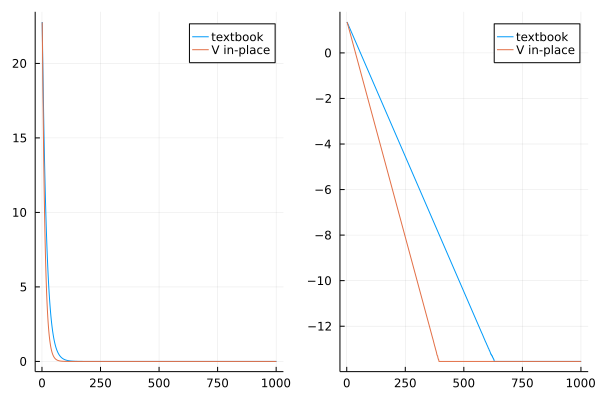

In [30]:
l = @layout [a b]
p1 = plot(Δ_textbook, label="textbook")
plot!(Δ_Vinplace, label="V in-place")
p2 = plot(log10.(Δ_textbook), label="textbook")
plot!(log10.(Δ_Vinplace), label="V in-place")
plot(p1, p2, layout = l)

### DP: Policy Optimization

#### DP: Policy Optimization using "textbook" **GPI**

In [31]:
function optimize_policy_textbook_GPI(; tol=1e-4, maxiter=5)
    𝐩 = copy(random_deterministic_policy)
    V = MDP.allocate_V(fmdp)
    Q = MDP.allocate_Q(fmdp)
    V[MDP.terminal_state(fmdp)] = 0
    converged = false
    iters_no = 1000
    for i = 1:1000
        MDP.dp_evaluate_policy_textbook!(V, Q, fmdp, 𝐩, 1.0; tol = tol, maxiter = maxiter)
        modified = MDP.𝐩_from_Q!(𝐩, Q)
        if !modified
            iters_no = i
            converged = true
            break
        end
    end # for: iterations
    return 𝐩, V, iters_no
end

optimize_policy_textbook_GPI (generic function with 1 method)

In [32]:
𝐩, V, iters_no = optimize_policy_textbook_GPI(tol=1e-12, maxiter=5)

ΔV = abs.((V - optimal_V))
err = max(ΔV...)

print("DP: policy optimization (textbook GPI): max abs err = $err (iters no = $iters_no)")
𝐩_to_matrix_form_with_errors(𝐩, optimal_𝐏)

DP: policy optimization (textbook GPI): max abs err = 0.0 (iters no = 4)

4×4 Matrix{Char}:
 '█'  '←'  '←'  '↓'
 '↑'  '↑'  '↑'  '↓'
 '↑'  '↑'  '↓'  '↓'
 '↑'  '→'  '→'  '█'

In [33]:
maxiter = [1, 5, 10, 20, 30, 50, 75, 100]
total_iter = NaN * ones(size(maxiter))

for (i, iter) in enumerate(maxiter)
    𝐩, V, iters_no = optimize_policy_textbook_GPI(tol=1e-12, maxiter=iter)

    total_iter[i] = iters_no * iter
    ΔV = abs.((V - optimal_V))
    err = max(ΔV...)
    println("DP: policy optimization (textbook GPI with maxiter=$iter): iters no = $iters_no (outer), $(iters_no * iter) (total)")
end

DP: policy optimization (textbook GPI with maxiter=1): iters no = 7 (outer), 7 (total)
DP: policy optimization (textbook GPI with maxiter=5): iters no = 4 (outer), 20 (total)
DP: policy optimization (textbook GPI with maxiter=10): iters no = 4 (outer), 40 (total)
DP: policy optimization (textbook GPI with maxiter=20): iters no = 4 (outer), 80 (total)
DP: policy optimization (textbook GPI with maxiter=30): iters no = 4 (outer), 120 (total)
DP: policy optimization (textbook GPI with maxiter=50): iters no = 4 (outer), 200 (total)
DP: policy optimization (textbook GPI with maxiter=75): iters no = 4 (outer), 300 (total)
DP: policy optimization (textbook GPI with maxiter=100): iters no = 4 (outer), 400 (total)


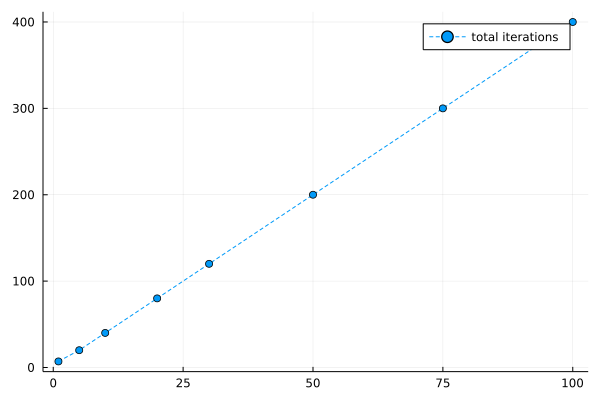

In [34]:
total_iter_textbook = total_iter
plot(maxiter, total_iter, linestyle=:dash, marker=:circle, label="total iterations")

#### DP: Policy Optimization using in-place update of V (Value Iteration)

In [35]:
function optimize_policy_V_inplace(; tol=1e-12, maxiter=1000)
    V = MDP.allocate_V(fmdp)
    V[MDP.terminal_state(fmdp)] = 0

    converged = false
    iters_no = maxiter
    for i = 1:maxiter
        Δ = MDP.dp_update_V!(V, fmdp, 1.0)
        if Δ < tol
            converged = true
            iters_no = i
            break
        end
    end

    return V, iters_no
end

optimize_policy_V_inplace (generic function with 1 method)

In [36]:
V, iters_no = optimize_policy_V_inplace(tol=1e-12, maxiter=1000)
ΔV = abs.((V - optimal_V))
err = max(ΔV...)
println("DP: policy optimization (value iteration): max abs err = $err (iters no = $iters_no)")

DP: policy optimization (value iteration): max abs err = 0.0 (iters no = 5)


## Monte Karlo

### MK: Baseline implementation

#### Baseline MK: Policy Evaluation

In [37]:
function evaluate_policy_MK(; maxiter = 10000)
    simulator = MDP.create_simulator_from_policy(fmdp, uniform_random_policy, 1000)

    V = MDP.allocate_V(fmdp)
    Q = MDP.allocate_Q(fmdp)

    MDP.mk_evaluate_policy!(Q, simulator, 1.0; maxiter = maxiter)

    MDP.V_from_Q!(V, Q, 𝐏)
    return V
end

function evaluate_policy_MK_repeated(; maxiter = 10000, n_attempts = 5, verbose = true)
    total_err = 0.0
    for _ in 1:n_attempts
        V = evaluate_policy_MK(maxiter = maxiter)
        ΔV = abs.(V - V_uniform_random_policy)
        err = max(ΔV...)
        if verbose
            println("MK: policy evaluation (maxiter = $maxiter): max abs err = $err")
        end
        total_err += err
    end
    total_err /= n_attempts
    return total_err
end

evaluate_policy_MK_repeated (generic function with 1 method)

In [38]:
total_err = evaluate_policy_MK_repeated(maxiter = 10000, n_attempts = 10, verbose = true)
println("---")
println("MK: policy evaluation: mean max abs err = $total_err")

MK: policy evaluation (maxiter = 10000): max abs err = 0.4177338195529856
MK: policy evaluation (maxiter = 10000): max abs err = 0.3153811064297418
MK: policy evaluation (maxiter = 10000): max abs err = 0.8513464793751204
MK: policy evaluation (maxiter = 10000): max abs err = 0.5404657518112614
MK: policy evaluation (maxiter = 10000): max abs err = 0.5155233155861794
MK: policy evaluation (maxiter = 10000): max abs err = 0.5250111203295091
MK: policy evaluation (maxiter = 10000): max abs err = 0.30463537274123453
MK: policy evaluation (maxiter = 10000): max abs err = 0.4766789350431715
MK: policy evaluation (maxiter = 10000): max abs err = 0.5749664707793904
MK: policy evaluation (maxiter = 10000): max abs err = 0.7500209873001111
---
MK: policy evaluation: mean max abs err = 0.5271763358948706


In [39]:
maxiter = [1000, 5000, 10000, 25000, 50000, 100000]
mean_error = NaN*ones(size(maxiter))

for (i, iter) in enumerate(maxiter)
    mean_error[i] = evaluate_policy_MK_repeated(maxiter = iter, n_attempts = 5, verbose = false)
    println("MK: policy evaluation: mean max abs err after $iter iters. : $(mean_error[i])")
end

MK: policy evaluation: mean max abs err after 1000 iters. : 2.2064574964430044
MK: policy evaluation: mean max abs err after 5000 iters. : 0.9503833916605526
MK: policy evaluation: mean max abs err after 10000 iters. : 0.6224065995463747
MK: policy evaluation: mean max abs err after 25000 iters. : 0.3910214790374361
MK: policy evaluation: mean max abs err after 50000 iters. : 0.21863867931768938
MK: policy evaluation: mean max abs err after 100000 iters. : 0.1939980250511873


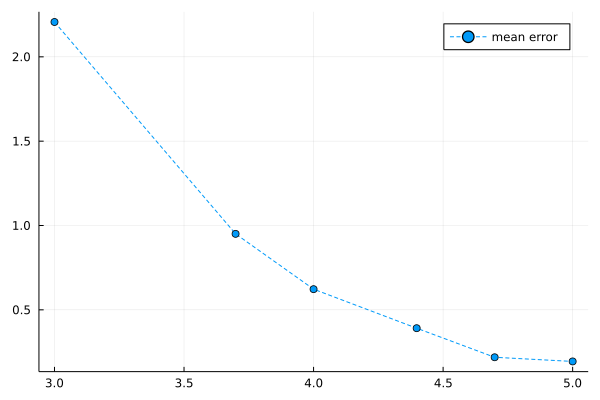

In [40]:
plot(log10.(maxiter), mean_error, linestyle=:dash, marker=:circle, label="mean error")

#### Baseline MK: Policy Optimization

In [41]:
𝐩 = copy(random_deterministic_policy)
simulator = MDP.create_simulator_from_policy(fmdp, 𝐩, 0.05, 100)

Q = MDP.allocate_Q(fmdp)
MDP.𝐩_from_Q!(𝐩, Q)

maxiter = 1000
iters_no = maxiter
for i = 1:maxiter
    MDP.mk_evaluate_policy!(Q, simulator, 1.0; maxiter = 10000)
    modified = MDP.𝐩_from_Q!(𝐩, Q)
    if !modified
        iters_no = i
        break
    end
end # for: iterations

V = MDP.allocate_V(fmdp)
MDP.V_from_Q!(V, Q, 𝐩)
ΔV = abs.(V - optimal_V)
err = max(ΔV...)
println("MK: policy optimization: max abs err = $err after $iters_no iterations.")

MK: policy optimization: max abs err = 0.13292682926829258 after 965 iterations.


In [42]:
Q

15×4 Matrix{Float64}:
 -2.05155  -3.11351  -3.09231  -1.0
 -3.08772  -4.09239  -4.16129  -2.06659
 -4.10828  -3.11439  -4.14706  -3.19022
 -1.0      -3.13575  -3.09223  -2.01802
 -2.06878  -4.07812  -4.13568  -2.06793
 -3.13018  -3.13333  -3.13208  -3.11832
 -4.09424  -2.06344  -3.10983  -4.11111
 -2.0727   -4.15029  -4.17708  -3.0914
 -3.1369   -3.13605  -3.11334  -3.17308
 -4.16402  -2.06146  -2.12308  -4.11333
 -3.09845  -1.0      -2.08333  -3.07583
 -3.13293  -4.12805  -3.16265  -4.12139
 -4.14706  -3.1506   -2.10036  -4.16763
 -3.09756  -2.08219  -1.0      -3.14359
  0.0       0.0       0.0       0.0

In [43]:
𝐩_to_matrix_form_with_errors(𝐩, optimal_𝐏)

4×4 Matrix{Char}:
 '█'  '←'  '←'  '↓'
 '↑'  '←'  '←'  '↓'
 '↑'  '→'  '↓'  '↓'
 '↑'  '→'  '→'  '█'

### MK: Incremental implementation

#### Incremental MK: Policy evaluation

In [52]:
𝐏 = copy(uniform_random_policy)
simulator = MDP.create_simulator_from_policy(fmdp, 𝐏, 1000)

Q = MDP.allocate_Q(fmdp)
Q[MDP.terminal_state(fmdp), :] .= 0.0

ΔQ = -Inf
for _ = 1:10000
    ΔQ = MDP.mk_update_Q!(Q, 0.99, simulator, 1.0)
end

V = MDP.allocate_V(fmdp)
MDP.V_from_Q!(V, Q, 𝐏)
ΔV = abs.((V - V_uniform_random_policy))
err = max(ΔV...)
println("MK: policy evaluation (incremental): max abs err = $err (final ΔQ = $ΔQ)")

MK: policy evaluation (incremental): max abs err = 1.5632083972582187 (final ΔQ = 0.19600027053746416)


In [53]:
Q

15×4 Matrix{Float64}:
 -13.5859  -18.2585  -19.3505   -1.0
 -22.6188  -23.9642  -23.433   -13.6204
 -20.576   -19.9359  -23.1443  -23.3366
  -1.0     -21.2234  -19.9491  -13.807
 -14.2934  -19.4933  -20.0818  -15.4069
 -22.8256  -20.9643  -24.0959  -17.2472
 -23.404   -16.1972  -23.638   -23.0136
 -15.9096  -23.7987  -20.4101  -22.7013
 -17.1802  -18.2384  -19.1314  -22.7065
 -21.7454  -13.6701  -16.8976  -20.4169
 -22.1957   -1.0     -15.4666  -18.7977
 -20.6567  -23.8062  -21.1069  -23.8839
 -20.4449  -21.5036  -13.3803  -21.5421
 -16.5378  -14.3855   -1.0     -20.692
   0.0       0.0       0.0       0.0

In [54]:
𝐩_to_matrix_form_with_errors(𝐩, optimal_𝐏)

4×4 Matrix{Char}:
 '█'  '←'  '←'  '↓'
 '↑'  '←'  '←'  '↓'
 '↑'  '→'  '↓'  '↓'
 '↑'  '→'  '→'  '█'

In [55]:
MDP.V_from_Q!(V, Q, 𝐏)
V_to_matrix_form(round.(V; digits=2))

4×4 Matrix{Float64}:
   0.0   -13.05  -20.91  -21.75
 -13.99  -17.32  -21.28  -21.56
 -20.7   -19.31  -18.18  -14.36
 -22.36  -19.22  -13.15    0.0

#### Incremental MK: Policy Optimization

In [58]:
Q = MDP.allocate_Q(fmdp)
Q[MDP.terminal_state(fmdp), :] .= 0.0

simulator = MDP.create_simulator_from_Q(fmdp, Q, 0.05, 1000)

ΔQ = -Inf
for i = 1:10000
    ΔQ = MDP.mk_update_Q!(Q, 0.95, simulator, 1.0)
end # for: iterations

V = MDP.allocate_V(fmdp)
MDP.V_from_Q!(V, Q)
ΔV = abs.(V - optimal_V)
err = max(ΔV...)
print("MK: policy optimization (incremental): max abs err = $err (final ΔQ = $ΔQ)")

MK: policy optimization (incremental): max abs err = 0.08101684076802051 (final ΔQ = 0.005648267556928488)

In [59]:
Q

15×4 Matrix{Float64}:
 -2.04072  -3.0213   -3.0984   -1.0
 -3.10534  -4.13356  -4.08549  -2.03926
 -4.15886  -3.08102  -4.13717  -3.29071
 -1.0      -3.01028  -3.02064  -2.00273
 -2.04196  -4.14461  -4.10732  -2.1225
 -3.12385  -3.1353   -3.09854  -3.05667
 -4.08832  -2.0328   -3.05247  -4.01727
 -2.01575  -4.06881  -4.06715  -3.21638
 -3.10209  -3.35291  -3.042    -3.28445
 -4.1175   -2.01633  -2.08341  -4.11868
 -3.12868  -1.0      -2.04416  -3.00439
 -3.13876  -4.10765  -3.06022  -4.21065
 -4.09544  -3.16245  -2.05214  -4.17113
 -3.10927  -2.0049   -1.0      -3.13461
  0.0       0.0       0.0       0.0

In [61]:
𝐩 = MDP.allocate_𝐩(Q)
MDP.𝐩_from_Q!(𝐩, Q)
𝐩_to_matrix_form_with_errors(𝐩, optimal_𝐏)

4×4 Matrix{Char}:
 '█'  '←'  '←'  '↓'
 '↑'  '↑'  '←'  '↓'
 '↑'  '→'  '↓'  '↓'
 '→'  '→'  '→'  '█'

In [71]:
function optimize_policy_MK_incremental(; γ = 0.95, ε = 0.05)
    Q = MDP.allocate_Q(fmdp)
    Q[MDP.terminal_state(fmdp), :] .= 0.0
    simulator = MDP.create_simulator_from_Q(fmdp, Q, ε, 1000)

    𝐩 = MDP.allocate_𝐩(Q)

    ΔQ = -Inf
    maxiter = 10000
    iters_no = maxiter
    for i = 1:maxiter
        ΔQ = MDP.mk_update_Q!(Q, γ, simulator, 1.0)
        MDP.𝐩_from_Q!(𝐩, Q)
        #! It does NOT WORK if we only check whether policy is changed or not!
        if ΔQ < 1e-4
            iters_no = i
            break
        end
    end # for: iterations
    return iters_no, Q
end

optimize_policy_MK_incremental (generic function with 1 method)

In [80]:
iters_no, Q = optimize_policy_MK_incremental(γ = 0.95, ε = 0.05)

V = MDP.allocate_V(fmdp)
MDP.V_from_Q!(V, Q)
ΔV = abs.(V - optimal_V)
err = max(ΔV...)
print("MK: policy optimization (incremental): max abs err = $err (final ΔQ = $ΔQ) after $iters_no iters.")

MK: policy optimization (incremental): max abs err = 12.985970823312519 (final ΔQ = 0.005648267556928488) after 10 iters.

In [81]:
V_to_matrix_form(V)

4×4 Matrix{Float64}:
   0.0        0.541074  -4.86007   -15.986
   0.225834  -9.37494   -3.51807   -11.3423
   0.286958  -2.61672   -1.48309    -0.0552419
 -10.2169     0.143288   0.427216    0.0

In [82]:
𝐩 = MDP.allocate_𝐩(Q)
MDP.𝐩_from_Q!(𝐩, Q)
𝐩_to_matrix_form_with_errors(𝐩, optimal_𝐏)

4×4 Matrix{Char}:
 '█'  '←'  '⍗'  '⍈'
 '↑'  '⍈'  '→'  '↓'
 '⍇'  '→'  '→'  '↓'
 '↑'  '→'  '→'  '█'

In [ ]:
γ_array = [0.75, 0.9, 0.95, 0.99]

for γ in γ_array
    iters_no, Q = optimize_policy_MK_incremental(γ = γ, ε = 0.05)
    V = MDP.allocate_V(fmdp)
    MDP.V_from_Q!(V, Q)
    ΔV = abs.(V - optimal_V)
    err = max(ΔV...)
    println("MK: policy optimization (incremental γ = $γ): max abs err = $err after $iters_no iters.")
end

In [ ]:
𝐩 = MDP.allocate_𝐩(Q)
MDP.𝐩_from_Q!(𝐩, Q)
𝐩_to_matrix_form(𝐩)

In [ ]:
V = MDP.allocate_V(fmdp)
Q = MDP.allocate_Q(fmdp)
V[MDP.terminal_state(fmdp)] = 0

compute_Δ = V_ -> max.((abs.(V_ - optimal_V))...)

simulator = MDP.create_simulator_from_Q(fmdp, Q, 0.05, 1000)

maxiter = 10000
iters_no = maxiter

δ = zeros(iters_no+1)
Δ = zeros(iters_no+1)

δ[1] = NaN
Δ[1] = compute_Δ(V)

for i in 1:maxiter
    δ[i+1] = MDP.mk_update_Q!(Q, 0.95, simulator, 1.0)
    MDP.V_from_Q!(V, Q)
    Δ[i+1] = compute_Δ(V)
end # for: iterations

plot(Δ, label="error")
plot!(δ, label="incremental diff.")

In [ ]:
𝐩 = MDP.allocate_𝐩(Q)
MDP.𝐩_from_Q!(𝐩, Q)
𝐩_to_matrix_form(𝐩)